In [1]:
# Things move fast
# Old:
with tokenizer.as_target_tokenizer():
  targets = tokenizer(fr_sentence)

# New:
targets = tokenizer(text_targets=es_sentence)

NameError: ignored

In [2]:
# sentencepiece is req. for the tokenizer to work
!pip install transformers datasets sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 126.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [3]:
#
from datasets import load_dataset
# possible language pairs: https://opus.nlpl.eu/KDE4.php
data = load_dataset("kde4", lang1="en", lang2="sv")
data

Generating train split: 0 examples [00:00, ? examples/s]

Dataset kde4 downloaded and prepared to /root/.cache/huggingface/datasets/kde4/en-sv-lang1=en,lang2=sv/0.0.0/243129fb2398d5b0b4f7f6831ab27ad84774b7ce374cf10f60f6e1ff331648ac. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 232485
    })
})

In [4]:
# make the dataset managable
small = data["train"].shuffle(seed=42).select(range(1_000))

In [5]:
# split the dataset into train and test
split = small.train_test_split(seed=42)

In [6]:
# print out one sample from the dataset
split["train"][0]

{'id': '95084', 'translation': {'en': 'Download', 'sv': 'Ladda ner'}}

In [7]:
# load up the tokenizer object
from transformers import AutoTokenizer

checkpoint = "Helsinki-NLP/opus-mt-en-sv"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [8]:
# print out anexample sentence pair
en = split['train'][5]['translation']['en']
sv = split['train'][5]['translation']['sv']

en, sv

('with this Polygonal', 'med den här polygonformen')

In [9]:
# tokenize the input sentence
inputs = tokenizer(en)
inputs

{'input_ids': [44, 56, 12284, 5844, 314, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [10]:
# tokenize the target sentence
with tokenizer.as_target_tokenizer():
  targets = tokenizer(sv)
targets

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3606: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


{'input_ids': [30, 35, 93, 4721, 5844, 30212, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

In [11]:
# look at the tokens for the target
tokenizer.convert_ids_to_tokens(targets['input_ids'])

['▁med', '▁den', '▁här', '▁poly', 'gon', 'formen', '</s>']

In [12]:
# wrong language, this loks alot differnt from the above(the english tokenizer does not know swedish words), correct example
bad_targets = tokenizer(sv)
tokenizer.convert_ids_to_tokens(bad_targets['input_ids'])

['▁med', '▁den', '▁h', 'är', '▁poly', 'gon', 'for', 'men', '</s>']

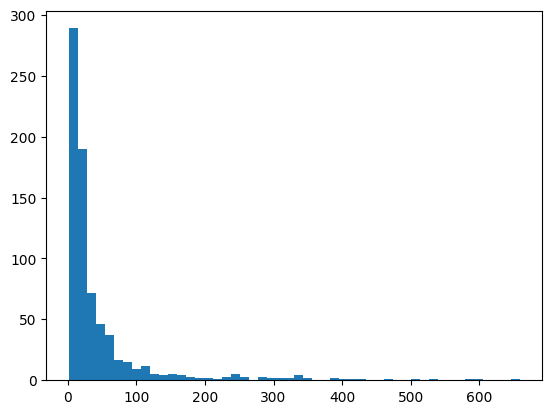

In [13]:
# draw a histogram of the inputs and targets
import matplotlib.pyplot as plt

train = split['train']['translation']
input_lens = [len(tr['en']) for tr in train]

plt.hist(input_lens, bins=50);

(array([202., 208., 108.,  59.,  42.,  24.,  14.,  14.,  10.,  11.,   2.,
          4.,   3.,   3.,   7.,   0.,   4.,   5.,   2.,   1.,   0.,   4.,
          2.,   3.,   3.,   1.,   2.,   0.,   2.,   0.,   0.,   1.,   1.,
          1.,   0.,   1.,   1.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.]),
 array([  1.  ,  14.62,  28.24,  41.86,  55.48,  69.1 ,  82.72,  96.34,
        109.96, 123.58, 137.2 , 150.82, 164.44, 178.06, 191.68, 205.3 ,
        218.92, 232.54, 246.16, 259.78, 273.4 , 287.02, 300.64, 314.26,
        327.88, 341.5 , 355.12, 368.74, 382.36, 395.98, 409.6 , 423.22,
        436.84, 450.46, 464.08, 477.7 , 491.32, 504.94, 518.56, 532.18,
        545.8 , 559.42, 573.04, 586.66, 600.28, 613.9 , 627.52, 641.14,
        654.76, 668.38, 682.  ]),
 <BarContainer object of 50 artists>)

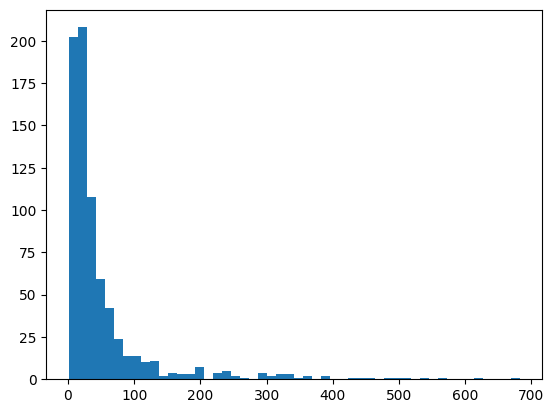

In [14]:
# draw a histogram of the target
target_lens = [len(tr['sv']) for tr in train]
plt.hist(target_lens, bins = 50)

In [15]:
# ser maximun sequence lenght
max_input_len = 128
max_target_len = 128

In [16]:
# tokenizer function
def tokenizer_fn(batch):
  inputs = [x['en'] for x in batch['translation']]
  targets = [x['sv'] for x in batch['translation']]

  tokenized_inputs = tokenizer(
      inputs, max_length=max_input_len, truncation=True
  )
  with tokenizer.as_target_tokenizer():
    tokenized_targets = tokenizer(
        targets, max_length=max_target_len, truncation=True
    )
    tokenized_inputs['labels'] = tokenized_targets['input_ids']
    return tokenized_inputs

In [17]:
# map the tokenizer function to the dataset dict and remove the original columns
tokenized_datasets = split.map(
    tokenizer_fn,
    batched=True, #batch_size=1, num_proc=2,
    remove_columns=split['train'].column_names,
)

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

Map:   0%|          | 0/250 [00:00<?, ? examples/s]

In [18]:
# load up our prerained model
from transformers import AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

In [19]:
# create our datacollator
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [20]:
# test out our data collator, outputs a dict of lists
[tokenized_datasets["train"][i] for i in range(1, 3)]

[{'input_ids': [92,
   81,
   2652,
   47,
   1350,
   893,
   20807,
   20372,
   21929,
   57,
   26580,
   42402,
   21929,
   6,
   68,
   2,
   0],
  'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  'labels': [140,
   61,
   2586,
   2741,
   35,
   30,
   41186,
   12227,
   7613,
   60,
   31128,
   22835,
   7613,
   2,
   68,
   0]},
 {'input_ids': [6249, 0], 'attention_mask': [1, 1], 'labels': [25235, 0]}]

In [21]:
# test the dataCollator on the above inputs
batch = data_collator([tokenized_datasets['train'][i] for i in range(1, 3)])
batch.keys()

dict_keys(['input_ids', 'attention_mask', 'labels', 'decoder_input_ids'])

In [22]:
# print out the labels
batch["labels"]

tensor([[  140,    61,  2586,  2741,    35,    30, 41186, 12227,  7613,    60,
         31128, 22835,  7613,     2,    68,     0],
        [25235,     0,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100]])

In [23]:
# think of seq2seq RNN's - the decoder RNN must have "some" input
# it's just like a language model where we predict the next word from
# previous words!
batch['decoder_input_ids']

tensor([[56433,   140,    61,  2586,  2741,    35,    30, 41186, 12227,  7613,
            60, 31128, 22835,  7613,     2,    68],
        [56433, 25235,     0, 56433, 56433, 56433, 56433, 56433, 56433, 56433,
         56433, 56433, 56433, 56433, 56433, 56433]])

In [24]:
# the first token is a pad!
tokenizer.convert_ids_to_tokens(batch["decoder_input_ids"][0])

['<pad>',
 '▁Du',
 '▁kan',
 '▁antingen',
 '▁nå',
 '▁den',
 '▁med',
 '▁Brev',
 '▁Skapa',
 '▁filter',
 '▁eller',
 '▁Inställningar',
 '▁Anpassa',
 '▁filter',
 '.',
 '...']

In [25]:
# the labels are one step ahead - just like a language model
tokenizer.convert_ids_to_tokens(batch["labels"][0])

['▁Du',
 '▁kan',
 '▁antingen',
 '▁nå',
 '▁den',
 '▁med',
 '▁Brev',
 '▁Skapa',
 '▁filter',
 '▁eller',
 '▁Inställningar',
 '▁Anpassa',
 '▁filter',
 '.',
 '...',
 '</s>']

In [26]:
# print out the real sample itself
split['train'][1]

{'id': '49716',
 'translation': {'en': 'You can reach it either via Message Create Filter or Settings Configure Filters....',
  'sv': 'Du kan antingen nå den med Brev Skapa filter eller Inställningar Anpassa filter....'}}

In [27]:
# install metrics we need
!pip install sacrebleu bert-score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 8.2 MB/s eta 0:00:00


In [28]:
# import function ad load up our two metrics
from datasets import load_metric
bleu_metric = load_metric("sacrebleu")
bert_metric = load_metric("bertscore")

<ipython-input-28-c93ad002457b>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  bleu_metric = load_metric("sacrebleu")


In [29]:
# targets must be in a list - as you recall, for bleu there can be multiple
# acceptable reference translations
bleu_metric.compute(predictions=["I love bumblebees"], references=[["I love bumblebees"]])

{'score': 0.0,
 'counts': [3, 2, 1, 0],
 'totals': [3, 2, 1, 0],
 'precisions': [100.0, 100.0, 100.0, 0.0],
 'bp': 1.0,
 'sys_len': 3,
 'ref_len': 3}

In [30]:
# Above gives 0 because it's not good on short sentences
s = "Marian is an efficient NMT framework written in pure C++"
bleu_metric.compute(predictions=[s], references=[[s]])

{'score': 100.00000000000004,
 'counts': [12, 11, 10, 9],
 'totals': [12, 11, 10, 9],
 'precisions': [100.0, 100.0, 100.0, 100.0],
 'bp': 1.0,
 'sys_len': 12,
 'ref_len': 12}

In [31]:
# compare two almost similar scentences with bert, 98% it's understand meaning and not jjust try to match words
bert_metric.compute(
    predictions=["I love bumblebees"], references=[["I like bumblebees"]], lang='en')


{'precision': [0.9803112745285034],
 'recall': [0.9803112745285034],
 'f1': [0.9803112745285034],
 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.29.1)'}

In [32]:
# define our own compute metrics function
import numpy as np

def compute_metrics(preds_and_labels):
  # preds are not logits, but token ids
  preds, labels = preds_and_labels

  # convert predictions into words
  decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

  # for any -100 label, replace with pad token id
  labels = np.where(labels != -100, labels, tokenizer.pad_token_id)

  # convert labels into words
  decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

  # get rid of extraneous whitespace
  # and also, put targets into lists
  decoded_preds = [pred.strip() for pred in decoded_preds]
  decoded_labels = [[label.strip()] for label in decoded_labels]

  bleu = bleu_metric.compute(
      predictions=decoded_preds, references=decoded_labels
  )
  bert_score = bert_metric.compute(
      predictions=decoded_preds, refernces=decoded_labels, lang='sv'
  )
  return {"bleu": bleu["score"], 'bert_score':np.mean(bert_score['f1'])}

In [33]:
# To get the cells below to work properly
#!pip install --upgrade accelerate
!pip install git+https://github.com/huggingface/accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/accelerate to /tmp/pip-req-build-n_e1k2eg
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate /tmp/pip-req-build-n_e1k2eg
  Resolved https://github.com/huggingface/accelerate to commit dcde1e93d09abea02a8e7f4a07a2c5734b87b60e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for accelerate: filename=accelerate-0.20.0.dev0-py3-none-any.whl size=222965 sha256=a8ab79fbeffc2767d651b0c41cb41984a2f06ea525877aeab4ced8b7b42ed337
  Stored in directory: /tmp/pip-ephem-wheel-cache-usagnbhh/wheels/f6/c7/9d/1b8a5ca8353d9307733bc719107acb67acdc95063bba749f26
Successfully built accelerate


In [34]:
!pip install transformers==4.28.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 71.4 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.29.1
    Uninstalling transformers-4.29.1:
      Successfully uninstalled transformers-4.29.1


In [35]:
# 
from transformers import Seq2SeqTrainingArguments
training_args = Seq2SeqTrainingArguments(
    "finetuned-model",
    evaluation_strategy="no",# saves GPU power
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=3,
    predict_with_generate=True,
    fp16=True, #use float with 1 bits instead of 32 bits, saves GPU ram
)

In [36]:
# instanciet a seq2seq trainer object
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [ ]:
# let's check our metrics before we start!
trainer.evaluate(max_length=max_target_len)

In [38]:
# may run out of GPU memory - try to restart runtime
# or get a more powerful gpu!
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss


TrainOutput(global_step=72, training_loss=1.1620310677422419, metrics={'train_runtime': 27.0672, 'train_samples_per_second': 83.126, 'train_steps_per_second': 2.66, 'total_flos': 45225185771520.0, 'train_loss': 1.1620310677422419, 'epoch': 3.0})

In [ ]:
# let's check our metrics again
trainer.evaluate(max_length=max_target_len)

In [74]:
# unmount, mount and check files
drive.flush_and_unmount()
drive.mount('/drive')
!ls

Mounted at /drive
'C:\Users\Rocks\Desktop\NLP-models\my_saved_translation_sv_en_model'
'C:\Users\Rocks\Desktop\NLP-models\my_saved_translation_sv_en_model.h5'
'C:\Users\Rocks\Desktop\NLP-models\my_saved_translation_sv_en_model.pt'
 drive
 finetuned-model
 my_saved_model
 sample_data


In [79]:
# Zip the model
import shutil
shutil.make_archive('/content/my_saved_model', 'zip', '/content/my_saved_model')

'/content/my_saved_model.zip'

In [81]:
# download the zipped model
from google.colab import files
files.download('/content/my_saved_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
trainer.save_model("my_saved_model")

In [41]:
# load in our model in a pipeline object
from transformers import pipeline
translator = pipeline("translation", model='my_saved_model', device=0)

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [56]:
translator("I hope this course has helped you on yor data science journey!")

[{'translation_text': 'Jag hoppas att den här kursen har hjälpt dig på yor data science resa!'}]

In [57]:
translator("I love bumblebees")

[{'translation_text': 'Jag älskar humlor.'}]

In [82]:
translator("The sun gently rose above the horizon, casting its warm golden rays across the tranquil meadow. Birds chirped joyfully, heralding the arrival of a new day. The scent of blooming flowers filled the air, mingling with the refreshing breeze that whispered through the tall grass. In the distance, a river meandered peacefully, reflecting the vibrant hues of the surrounding nature. Trees swayed gracefully, their leaves rustling in harmony. Nature's symphony played, captivating all who ventured into this serene sanctuary. Time seemed to stand still as one immersed themselves in the beauty and tranquility that nature so generously offered")

[{'translation_text': 'Solen steg milt över horisonten och kastade sina varma gyllene strålar över den lugna ängen. Fåglarna kvittrade glatt, förebådade ankomsten av en ny dag. Doften av blommande blommor fyllde luften, minglade med den uppfriskande bris som viskade genom det höga gräset. På avstånd slingrade sig en flod lugnt, som reflekterade de livfulla nyanserna i den omgivande naturen. Träden svängde graciöst, deras löv prasslade i harmoni. Naturens symfoni spelade, fängslande alla som vågade sig in i denna fridfulla helgedom. Tiden verkade stå stilla som en nedsänkt sig i skönheten och lugnet som naturen så generöst erbjöd'}]

In [ ]:
translator("The city skyline stretched before me, a tapestry of towering skyscrapers and glimmering lights. People hurried along the bustling streets, their footsteps echoing amidst the cacophony of car horns and chatter. Each corner held its own story, its own rhythm, as the city pulsated with energy and life. I strolled through the urban labyrinth, weaving through the crowds, catching snippets of conversations in different languages. Street vendors lined the sidewalks, offering tantalizing aromas of sizzling kebabs, freshly brewed coffee, and exotic spices. The vibrant colors of their stalls beckoned passersby, enticing them to explore the culinary delights. As I wandered deeper into the city, I discovered hidden gems nestled between the concrete giants. Quaint cafes with cozy interiors welcomed weary souls seeking solace. Bookstores with shelves that seemed to touch the sky whispered tales of adventure, romance, and knowledge waiting to be devoured. Parks provided a respite from the urban chaos, inviting me to bask in nature's embrace. I found refuge under the shade of ancient trees, their branches swaying gently in the breeze. The symphony of birdsong and rustling leaves created a symphony that soothed my senses. Museums and art galleries stood as guardians of culture and history. They housed masterpieces that transcended time, evoking emotions and sparking introspection. I lost myself in brushstrokes, sculpted forms, and the stories they silently conveyed. Nightfall cast a magical aura over the city. Neon lights illuminated the streets, transforming them into rivers of color. Music spilled out from vibrant bars and clubs, inviting me to dance to its rhythm. Laughter echoed in the night air as friends gathered to celebrate life and create memories. Beyond the city's boundaries, nature's wonders awaited. Rolling hills, majestic mountains, and pristine beaches beckoned me to explore their vastness. I hiked along trails that wound through lush forests, breathing in the crisp, invigorating air. I stood in awe at the sight of cascading waterfalls and majestic canyons, feeling humbled by their grandeur. The city's heartbeat never ceased. It thrived with innovation, entrepreneurship, and diversity. Its streets were a melting pot of cultures, where people from all walks of life shared their stories and aspirations. I witnessed the power of unity and the beauty of embracing differences. As I bid farewell to the city, I carried its spirit within me. Its sights, sounds, and flavors had left an indelible mark on my soul. The city had taught me resilience, adaptability, and the importance of embracing change. It had opened my eyes to the endless possibilities that awaited beyond familiar horizons. Now, as I embark on new adventures, I carry the city's essence with me—a reminder of the vibrant tapestry of life and the unending wonders that lie just beyond the next corner.Note: The above text is a creative composition and may not represent a specific city or location.")

In [43]:
translator("The world is a fascinating place, full of wonders and mysteries waiting to be explored. From the majestic peaks of towering mountains to the depths of the vast oceans, there is so much beauty and diversity to behold. Every corner of the globe has its unique culture, traditions, and stories to share. It's a tapestry woven with the threads of history, art, and human experiences. People from different walks of life come together, forming connections and building bridges of understanding. In this interconnected world, we have the opportunity to learn, grow, and celebrate our shared humanity. Let us embrace curiosity, empathy, and respect as we embark on this incredible journey of discovery.")

[{'translation_text': 'Världen är en fascinerande plats, full av underverk och mysterier som väntar på att utforskas. Från de majestätiska topparna av höga berg till djupet av de vidsträckta oceanerna, finns det så mycket skönhet och mångfald att skåda. Varje hörn av världen har sin unika kultur, traditioner och berättelser att dela. Det är en vävning vävd med trådarna av historia, konst, och mänskliga erfarenheter. Människor från olika samhällsskikt kommer tillsammans, bildar förbindelser och bygga broar av förståelse. I denna sammanlänkade värld, har vi möjlighet att lära, växa, och fira vår gemensamma mänsklighet. Låt oss omfamna nyfikenhet, empati och respekt när vi ger oss ut på denna otroliga upptäcktsresa.'}]

In [ ]:
!ls